<IPython.core.display.Javascript object>


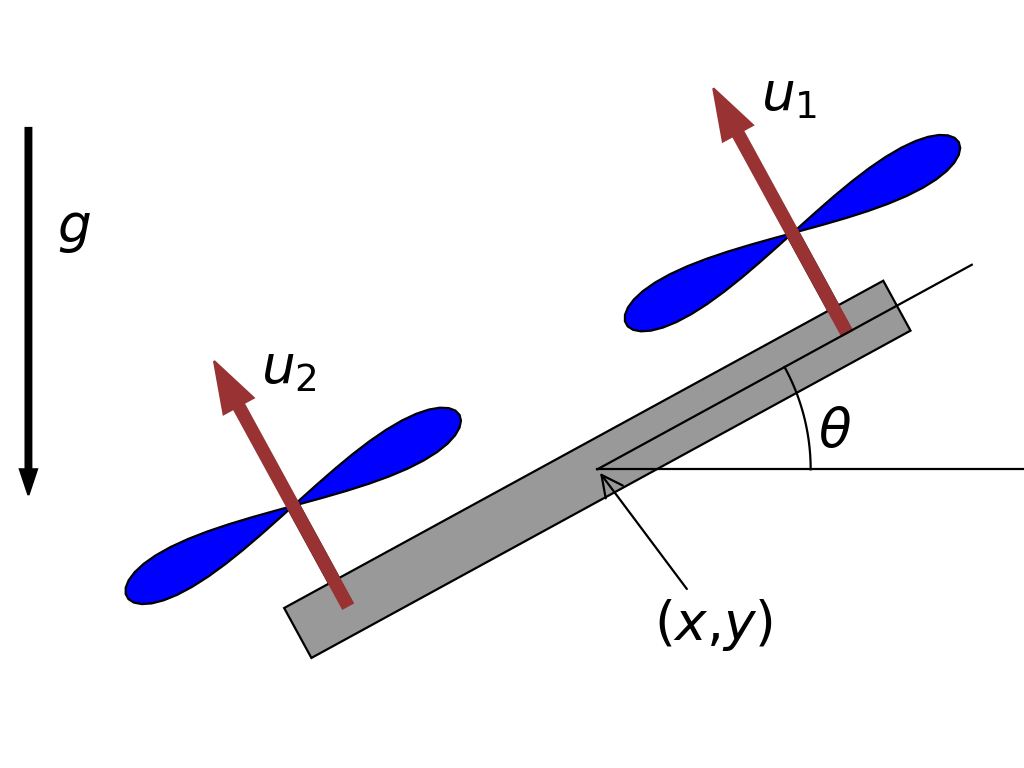

In [7]:
import sys
sys.path.insert(0,'/Users/russt/underactuated/src/quadrotor2d')

%matplotlib notebook  
import matplotlib.pyplot as plt
import numpy as np

from quadrotor2d import Quadrotor2DVisualizer

viz = Quadrotor2DVisualizer()
context = viz.CreateDefaultContext()
x = np.array([0, 0, .5, 0, 0, 0])
context.FixInputPort(0, x)
viz.draw(context)

R = np.array([[ np.cos(x[2]), -np.sin(x[2])], [np.sin(x[2]), np.cos(x[2])]])

plt.rcParams.update({'font.size': 24})
viz.ax.plot([0,1.5*viz.length],[0,0],'k', linewidth=1)
viz.ax.plot([0,1.5*viz.length*np.cos(x[2])], [0, 1.5*viz.length*np.sin(x[2])],'k', linewidth=1)
viz.ax.annotate('($x$,$y$)', xy=(0, 0), xytext=(0.05,-.15), arrowprops={"arrowstyle": "->"})
t = np.linspace(0,x[2],25)
viz.ax.plot(.75*viz.length*np.cos(t), 0.75*viz.length*np.sin(t),'k', linewidth=1)
viz.ax.annotate(r'$\theta$', xy=(.8*viz.length*np.cos(x[2]/2), 0.8*viz.length*np.sin(x[2]/2)-.03))
pts = np.dot(R,np.array([[viz.length, viz.length],[0, 0.8*viz.length]]))
viz.ax.arrow(pts[0,0],pts[1,0],pts[0,1]-pts[0,0],pts[1,1]-pts[1,0], color=[.6,.2,.2], width=0.01)
viz.ax.annotate('$u_1$', xy=pts[:,1]+.02)
pts = np.dot(R,np.array([[-viz.length, -viz.length],[0, 0.8*viz.length]]))
viz.ax.arrow(pts[0,0],pts[1,0],pts[0,1]-pts[0,0],pts[1,1]-pts[1,0], color=[.6,.2,.2], width=0.01)
viz.ax.annotate('$u_2$', xy=pts[:,1]+.02)
viz.ax.arrow(-2*viz.length,.3,0,-.3, color='k', width=0.005)
viz.ax.annotate('$g$', xy=(-1.9*viz.length, .2))
viz.ax.set_title('')
viz.ax.set_xlim(-2.1*viz.length, 1.5*viz.length)
viz.ax.set_ylim(-.05, 0.2)

plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])
plt.show()

plt.savefig("quadrotor2d.svg")